# This page is analyzing the model based on Luca's annotation

#

# N starvation 

## Which N sources allow HOT1A3 to grow

check out Escher visualization https://escher.readthedocs.io/en/latest/getting_started.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cobra
import numpy as np
import seaborn as sns
import itertools
from matplotlib.colors import LogNorm, Normalize


In [2]:
import subprocess
import time


In [3]:
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis import production_envelope


In [4]:
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [5]:
sns.hls_palette

<function seaborn.palettes.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False)>

In [99]:
def get_elements(rid):
    r = model.reactions.get_by_id(rid)
    m = r.reactants[0]    
    elements = m.elements.copy()
    
    res = {
        'reaction' : rid,
        'metabolite' : m.name,
        'N' : 'N' in elements,
        'C' : 'C' in elements,
        
    }
    return pd.Series(res)

# Import model and manipulate based on Ofaim at el

In [8]:
import os
os.listdir('..')

['model.xml', '.git', 'N_Starvation', '.github', 'README.md', 'index.html']

In [9]:
import os
model_dpath = os.path.join('..')
model_fname = 'model.xml'
model_fpath = os.path.join(model_dpath, model_fname)


In [10]:
model = cobra.io.read_sbml_model(model_fpath)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [11]:
exchange_ids = [r.id for r in model.exchanges] # + ["R00024"]

In [12]:
print('reactions', len(model.reactions))
print('metabolites', len(model.metabolites))
print('genes', len(model.genes))

reactions 2401
metabolites 1558
genes 1069


In [13]:
model

Name,Hot1A3_LB
Memory address,0x07f95dd93aa90
Number of metabolites,1558
Number of reactions,2401
Number of groups,0
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [14]:
cobra.Configuration()

Attribute,Description,Value
solver,Mathematical optimization solver,glpk
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,11
cache_directory,Path for the model cache,/home/oweissberg/.cache/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


In [16]:
exchange_ids

['EX_12ppd__R_e',
 'EX_12ppd__S_e',
 'EX_25dkglcn_e',
 'EX_2ameph_e',
 'EX_2m35mdntha_e',
 'EX_35dnta_e',
 'EX_3h4atb_e',
 'EX_3mb_e',
 'EX_4abut_e',
 'EX_4hba_e',
 'EX_4hbald_e',
 'EX_4hbz_e',
 'EX_5dglcn_e',
 'EX_5drib_e',
 'EX_6atha_e',
 'EX_LalaLglu_e',
 'EX_abg4_e',
 'EX_abt_e',
 'EX_ac_e',
 'EX_acac_e',
 'EX_acald_e',
 'EX_acgam_e',
 'EX_acmana_e',
 'EX_actn__R_e',
 'EX_ade_e',
 'EX_adn_e',
 'EX_ala_L_asp__L_e',
 'EX_ala_L_glu__L_e',
 'EX_ala_L_thr__L_e',
 'EX_ala__D_e',
 'EX_ala__L_e',
 'EX_ala_gln_e',
 'EX_ala_his_e',
 'EX_ala_leu_e',
 'EX_alaala_e',
 'EX_alagly_e',
 'EX_alahis_e',
 'EX_alaleu_e',
 'EX_alathr_e',
 'EX_alatrp_e',
 'EX_alltn_e',
 'EX_arab__L_e',
 'EX_arbt6p_e',
 'EX_arbt_e',
 'EX_arg__L_e',
 'EX_asn__L_e',
 'EX_aso3_e',
 'EX_aso4_e',
 'EX_asp__L_e',
 'EX_bhb_e',
 'EX_btn_e',
 'EX_btoh_e',
 'EX_but_e',
 'EX_bz_e',
 'EX_ca2_e',
 'EX_cellb_e',
 'EX_cgly_e',
 'EX_chol_e',
 'EX_chor_e',
 'EX_cinnm_e',
 'EX_cit_e',
 'EX_cl_e',
 'EX_co2_e',
 'EX_co_e',
 'EX_cobalt2_e',


In [17]:
model.reactions.get_by_id('EX_cyan_e')

Reaction identifier,EX_cyan_e
Name,R_EX_cyan_e
Memory address,0x7f95db710be0
Stoichiometry,cyan_e <=> Hydrogen cyanide <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [19]:
model.reactions.get_by_id('Growth')

Reaction identifier,Growth
Name,Biomass reaction
Memory address,0x7f95db628760
Stoichiometry,0.000223 10fthf_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 0.0001... 0.000223 10-Formyltetrahydrofolate + 0.513689 L-Alanine + 0.000223 S-Adenosyl-L-methionine + 0.295792 L-Arginine + 0.241055 L-Asparagine + 0.241055 L-Aspartate + 54.124831 ATP C10H12N5O13P3 +...
GPR,
Lower bound,0.0
Upper bound,1000.0


# Identify N sources where MED4 grows on

In [21]:
len(model.medium)

251

In [22]:
len(exchange_ids)

251

In [28]:
# copied from MED4 model
pro99_mediums = ['Ammonia', 'Cadmium', 'Ca2+', 'Cl-', 'Cobalt ion', 'Copper',
       'Orthophosphate', 'H2O', 'HCO3-', 'H+', 'Fe2+', 'Photon',
       'Magnesium cation', 'Molybdenum', 'O2', 'K+', 'Selenate', 'Na+',
       'Strontium cation', 'Sulfate', 'Zn2+', 'Hydrogen peroxide']
print('\n'.join(pro99_mediums))

Ammonia
Cadmium
Ca2+
Cl-
Cobalt ion
Copper
Orthophosphate
H2O
HCO3-
H+
Fe2+
Photon
Magnesium cation
Molybdenum
O2
K+
Selenate
Na+
Strontium cation
Sulfate
Zn2+
Hydrogen peroxide


In [23]:
# what are the metabolites in the medium?
df_medium = pd.DataFrame({'mediumExchange' : model.medium.keys()})
df_medium = pd.DataFrame.from_records(df_medium.mediumExchange.apply(get_elements))


In [24]:
df_medium

,reaction,metabolite,N,C
0,EX_12ppd__R_e,"(R)-Propane-1,2-diol",False,True
1,EX_12ppd__S_e,"(S)-Propane-1,2-diol",False,True
2,EX_25dkglcn_e,"2,5-diketo-D-gluconate",False,True
3,EX_2ameph_e,2-Aminoethylphosphonate,True,True
4,EX_2m35mdntha_e,N 2 methyl 3 5 dinitrophenyl 4 methyl 3 5 di...,True,False
...,...,...,...,...
246,EX_val__L_e,L-Valine,True,True
247,EX_xan_e,Xanthine,True,True
248,EX_xtsn_e,Xanthosine,True,True
249,EX_xyl__D_e,D-Xylose,False,True


In [46]:
pro99_df = pd.read_excel('HOT1A3_medium.xlsx')

In [47]:
pro99_df.head()

,reaction,metabolite,N,C,pro99,MED4 metabolite,promm
0,EX_actn__R_e,R Acetoin C4H8O2,False,True,NaN,NaN,NaN
1,EX_bhb_e,(R)-3-Hydroxybutanoate,False,True,NaN,NaN,NaN
2,EX_12ppd__R_e,"(R)-Propane-1,2-diol",False,True,NaN,NaN,NaN
3,EX_12ppd__S_e,"(S)-Propane-1,2-diol",False,True,NaN,NaN,NaN
4,EX_phedca_e,10 Phenyldecanoic acid,False,True,NaN,NaN,NaN


In [48]:
promm_exchanges = pro99_df.loc[pro99_df.pro99.isin(['yes']) | pro99_df.promm.isin(['yes']), 'reaction']
pro99_exchanges = pro99_df.loc[pro99_df.pro99.isin(['yes']), 'reaction']
other_exchahges = [m for m in exchange_ids if m not in promm_exchanges]

In [49]:
# does it grow on promm?
with model:
    medium = model.medium
    for m in medium:
        medium[m] = 0.0
    for m in promm_exchanges:
        medium[m] = 1000.0
    model.medium = medium
    print ('model medium', model.medium)
    solution = model.optimize()
    print(model.summary())


model medium {'EX_ac_e': 1000.0, 'EX_btn_e': 1000.0, 'EX_ca2_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_glyc_e': 1000.0, 'EX_h2o2_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 1000.0, 'EX_inost_e': 1000.0, 'EX_k_e': 1000.0, 'EX_lac__D_e': 1000.0, 'EX_lac__L_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_nac_e': 1000.0, 'EX_ncam_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0, 'EX_pyr_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_zn2_e': 1000.0}
Objective
1.0 Growth = 26.272733366367966

Uptake
------
Metabolite     Reaction     Flux  C-Number C-Flux
     ca2_e     EX_ca2_e   0.1367         0  0.00%
      cl_e      EX_cl_e   0.1367         0  0.00%
 cobalt2_e EX_cobalt2_e 0.002627         0  0.00%
     cu2_e     EX_cu2_e  0.01863         0  0.00%
     fe2_e     EX_fe2_e   0.3933         0  0.00%
    glyc_e    EX_glyc_e      998         3 32.28%
       k_e 

In [50]:
# does it grow on pro99?
with model:
    medium = model.medium
    for m in medium:
        medium[m] = 0.0
    for m in pro99_exchanges:
        medium[m] = 1000.0
    model.medium = medium
    print ('model medium', model.medium)
    solution = model.optimize()
    print(model.summary())


model medium {'EX_ca2_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_h2o2_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 1000.0, 'EX_k_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_zn2_e': 1000.0}
Objective
1.0 Growth = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []



In [51]:
# try to add each exchange one by one
results = list()

def _check_medium(met1, met2=None):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        model.medium = medium
        solution = model.optimize()
        return {'uptake' : met1, 'objective_value' : solution.objective_value}
results = [_check_medium(met) for met in exchange_ids]        

In [52]:
df = pd.DataFrame(results)

In [53]:
df_growing = df.loc[(df.objective_value > 1e-5), 
                    ['uptake','objective_value']
                   ].nlargest(n=1000, columns='objective_value').reset_index(drop=True)

In [54]:
tdf = pd.DataFrame.from_records(df_growing.uptake.apply(get_elements))
df_growing = pd.merge(df_growing, tdf, left_on='uptake', right_on='reaction')

In [55]:
df_growing

,uptake,objective_value,reaction,metabolite,N,C
0,EX_g3ps_e,38.384919,EX_g3ps_e,Glycerophosphoserine,True,True
1,EX_cytd_e,29.728192,EX_cytd_e,Cytidine,True,True
2,EX_g3pc_e,29.471256,EX_g3pc_e,Sn-Glycero-3-phosphocholine,True,True
3,EX_gsn_e,27.314969,EX_gsn_e,Guanosine,True,True
4,EX_uri_e,25.055718,EX_uri_e,Uridine,True,True
...,...,...,...,...,...,...
72,EX_ura_e,8.278241,EX_ura_e,Uracil,True,True
73,EX_csn_e,8.278241,EX_csn_e,Cytosine,True,True
74,EX_xan_e,8.017782,EX_xan_e,Xanthine,True,True
75,EX_alltn_e,7.093165,EX_alltn_e,Allantoin,True,True


In [ ]:
# check that the media is correct

In [106]:
# try to add each exchange one by one
results = list()
not_open_boundary_ids = [i for i in exchange_ids if (i not in pro99_exchanges) and (i not in df_growing.reaction.values)]

def _check_medium(met1, met2=None):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        if met2 is not None:
            medium[met2] = 1000.0
        model.medium = medium
        solution = model.optimize()
        return {'uptake' : met1, 'uptake2' : met2, 'objective_value' : solution.objective_value}
results = [_check_medium(met1, met2) for met1, met2 in itertools.combinations(not_open_boundary_ids, 2)]        

In [107]:
df = pd.DataFrame(results)

In [108]:
df.head()

,uptake,uptake2,objective_value
0,EX_12ppd__R_e,EX_12ppd__S_e,0.0
1,EX_12ppd__R_e,EX_25dkglcn_e,0.0
2,EX_12ppd__R_e,EX_2m35mdntha_e,0.0
3,EX_12ppd__R_e,EX_35dnta_e,0.0
4,EX_12ppd__R_e,EX_3h4atb_e,0.0


In [111]:
df_growing2 = df.loc[(df.objective_value > 1e-5), 
                    ['uptake','uptake2', 'objective_value']
                   ].nlargest(n=1000, columns='objective_value').reset_index(drop=True)

In [112]:
df_growing2

,uptake,uptake2,objective_value
0,EX_g3pe_e,EX_no2_e,40.771116
1,EX_g3pi_e,EX_no2_e,40.771116
2,EX_g3pi_e,EX_ncam_e,40.541479
3,EX_g3pe_e,EX_ncam_e,40.541479
4,EX_g3pe_e,EX_nh4_e,39.352647
...,...,...,...
458,EX_co_e,EX_nh4_e,1.443230
459,EX_co_e,EX_no2_e,1.313720
460,EX_co_e,EX_no3_e,1.271677
461,EX_co_e,EX_tnt_e,1.184996


In [116]:
len(set(df_growing2.uptake.unique()) | set(df_growing2.uptake2.unique()))

84

In [123]:
(set(df_growing2.uptake.unique()) | set(df_growing2.uptake2.unique())) & set(df_growing.uptake.unique())

set()

In [118]:
df_growing2[['reaction', 'metabolite','N','C']] = df_growing2.uptake.apply(get_elements)
df_growing2[['reaction2', 'metabolite2','N2','C2']] = df_growing2.uptake2.apply(get_elements)

#df_growing = pd.merge(df_growing, tdf, left_on='uptake', right_on='reaction')

In [119]:
df_growing2

,uptake,uptake2,objective_value,reaction,metabolite,N,C,reaction2,metabolite2,N2,C2
0,EX_g3pe_e,EX_no2_e,40.771116,EX_g3pe_e,Sn-Glycero-3-phosphoethanolamine,True,True,EX_no2_e,Nitrite,True,False
1,EX_g3pi_e,EX_no2_e,40.771116,EX_g3pi_e,Sn-Glycero-3-phospho-1-inositol,False,True,EX_no2_e,Nitrite,True,False
2,EX_g3pi_e,EX_ncam_e,40.541479,EX_g3pi_e,Sn-Glycero-3-phospho-1-inositol,False,True,EX_ncam_e,Nicotinamide,True,True
3,EX_g3pe_e,EX_ncam_e,40.541479,EX_g3pe_e,Sn-Glycero-3-phosphoethanolamine,True,True,EX_ncam_e,Nicotinamide,True,True
4,EX_g3pe_e,EX_nh4_e,39.352647,EX_g3pe_e,Sn-Glycero-3-phosphoethanolamine,True,True,EX_nh4_e,Ammonium,True,False
...,...,...,...,...,...,...,...,...,...,...,...
458,EX_co_e,EX_nh4_e,1.443230,EX_co_e,Carbon monoxide,False,True,EX_nh4_e,Ammonium,True,False
459,EX_co_e,EX_no2_e,1.313720,EX_co_e,Carbon monoxide,False,True,EX_no2_e,Nitrite,True,False
460,EX_co_e,EX_no3_e,1.271677,EX_co_e,Carbon monoxide,False,True,EX_no3_e,Nitrate,True,False
461,EX_co_e,EX_tnt_e,1.184996,EX_co_e,Carbon monoxide,False,True,EX_tnt_e,2 4 6 Trinitrotoluene,True,False


### N sources that HOT1A3 can grow on 

In [56]:
df_growing

,uptake,objective_value,reaction,metabolite,N,C
0,EX_g3ps_e,38.384919,EX_g3ps_e,Glycerophosphoserine,True,True
1,EX_cytd_e,29.728192,EX_cytd_e,Cytidine,True,True
2,EX_g3pc_e,29.471256,EX_g3pc_e,Sn-Glycero-3-phosphocholine,True,True
3,EX_gsn_e,27.314969,EX_gsn_e,Guanosine,True,True
4,EX_uri_e,25.055718,EX_uri_e,Uridine,True,True
...,...,...,...,...,...,...
72,EX_ura_e,8.278241,EX_ura_e,Uracil,True,True
73,EX_csn_e,8.278241,EX_csn_e,Cytosine,True,True
74,EX_xan_e,8.017782,EX_xan_e,Xanthine,True,True
75,EX_alltn_e,7.093165,EX_alltn_e,Allantoin,True,True


### when all other potential mediums are available, HOT1A3 can grow on a combination of metabolites

- there is a list of 77 metabolites that enable growth when added to pro99. there are additional 174 metabolites that when all are available, it grows. for now do not pursue this list

In [120]:
# open all additional mediums (all those that do not facilitate growth by themselves)
not_open_boundary_ids = [i for i in exchange_ids if (i not in pro99_exchanges) and 
                         (i not in df_growing.reaction.values) and
                         (i not in df_growing2.reaction.values) and
                         (i not in df_growing2.reaction2.values)
                        ]
with model:
    medium = model.medium
    for m in medium:
        medium[m] = 0.0
    for m in pro99_exchanges:
        medium[m] = 1000.0
    medium["EX_nh4_e"] = 0.0
    for i in not_open_boundary_ids:
        medium[i] = 1000.0
    model.medium = medium
    solution = model.optimize()
    print(model.summary())


Objective
1.0 Growth = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []



In [121]:
len(not_open_boundary_ids), len(exchange_ids), len(pro99_exchanges), len(df_growing.reaction)

(90, 251, 19, 77)

In [62]:
251-19-77

155

### Force HOT1A3 to uptake the potential N/C sources, limit growth (biomass), and see what is secreted

In [68]:
def _force_feeding(met1):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        model.medium = medium
        model.reactions.get_by_id(met1).upper_bound = -1e-5
        model.reactions.Growth.upper_bound = 1e-2
        solution = model.slim_optimize()
        #print(met1, model.summary())
        print(met1)
        fluxes = flux_variability_analysis(model, model.boundary, loopless=True, fraction_of_optimum=0.9, processes=11)
        fluxes['uptake'] = met1
        return fluxes
fluxes_df_list = [_force_feeding(met1) for met1 in df_growing['uptake']]

EX_g3ps_e
EX_cytd_e
EX_g3pc_e
EX_gsn_e
EX_uri_e
EX_adn_e
EX_ins_e
EX_xtsn_e
EX_pro__L_e
EX_gln__L_e
EX_glu__L_e
EX_hishis_e
EX_ser__D_e
EX_ala_gln_e
EX_gthrd_e
EX_serglugly_e
EX_ala__L_e
EX_alaala_e
EX_ala__D_e
EX_ala_his_e
EX_alahis_e
EX_glyglygln_e
EX_asn__L_e
EX_LalaLglu_e
EX_asp__L_e
EX_ala_L_glu__L_e
EX_gly_gln_e
EX_glygln_e
EX_gly_pro__L_e
EX_progly_e
EX_lysglugly_e
EX_hisgly_e
EX_gly_glu__L_e
EX_glyglu_e
EX_orn_e
EX_gly_e
EX_glyb_e
EX_his__L_e
EX_alathr_e
EX_ala_L_thr__L_e
EX_glyphe_e
EX_gly_phe_e
EX_chol_e
EX_gly_tyr_e
EX_ala_L_asp__L_e
EX_phe__L_e
EX_tyr__L_e
EX_val__L_e
EX_gly_asn__L_e
EX_thr__L_e
EX_gly_asp__L_e
EX_ile__L_e
EX_ade_e
EX_leu__L_e
EX_gly_cys_e
EX_cgly_e
EX_glyser_e
EX_alagly_e
EX_hxan_e
EX_ala_leu_e
EX_alaleu_e
EX_gly_leu_e
EX_arg__L_e
EX_leuleu_e
EX_4abut_e
EX_ser__L_e
EX_glygly_e
EX_cys__L_e
EX_lys__L_e
EX_crn_e
EX_ptrc_e
EX_gua_e
EX_ura_e
EX_csn_e
EX_xan_e
EX_alltn_e
EX_2ameph_e


In [126]:
def _force_feeding2(met1, met2):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        medium[met2] = 1000.0
        model.medium = medium
        model.reactions.get_by_id(met1).upper_bound = -1e-5
        model.reactions.get_by_id(met2).upper_bound = -1e-5
        model.reactions.Growth.upper_bound = 1e-2
        solution = model.slim_optimize()
        #print(met1, model.summary())
        print(met1, met2)
        fluxes = flux_variability_analysis(model, model.boundary, loopless=True, fraction_of_optimum=0.9, processes=11)
        fluxes['uptake'] = met1
        fluxes['uptake2'] = met2
        return fluxes
fluxes2_df_list = [_force_feeding2(met1, met2) for met1, met2 in zip(df_growing2['uptake'], df_growing2['uptake2'])]

EX_g3pe_e EX_no2_e
EX_g3pi_e EX_no2_e
EX_g3pi_e EX_ncam_e
EX_g3pe_e EX_ncam_e
EX_g3pe_e EX_nh4_e
EX_g3pi_e EX_nh4_e
EX_g3pi_e EX_urea_e
EX_g3pe_e EX_urea_e
EX_g3pe_e EX_tnt_e
EX_g3pi_e EX_tnt_e
EX_g3pe_e EX_no3_e
EX_g3pi_e EX_no3_e
EX_malthx_e EX_ncam_e
EX_malthx_e EX_nh4_e
EX_malthx_e EX_urea_e
EX_malthx_e EX_no2_e
EX_man_e EX_ncam_e
EX_lcts_e EX_nh4_e
EX_fru_e EX_ncam_e
EX_lcts_e EX_ncam_e
EX_glc__D_e EX_ncam_e
EX_gal_e EX_ncam_e
EX_ncam_e EX_tre_e
EX_cellb_e EX_ncam_e
EX_melib_e EX_ncam_e
EX_ncam_e EX_raffin_e
EX_ncam_e EX_sucr_e
EX_malt_e EX_ncam_e
EX_cellb_e EX_nh4_e
EX_nh4_e EX_tre_e
EX_ncam_e EX_sbt__D_e
EX_mnl_e EX_ncam_e
EX_glyald_e EX_ncam_e
EX_nh4_e EX_raffin_e
EX_galt_e EX_ncam_e
EX_malt_e EX_nh4_e
EX_nh4_e EX_sucr_e
EX_melib_e EX_nh4_e
EX_fru_e EX_nh4_e
EX_tre_e EX_urea_e
EX_lcts_e EX_urea_e
EX_cellb_e EX_urea_e
EX_raffin_e EX_urea_e
EX_melib_e EX_urea_e
EX_sucr_e EX_urea_e
EX_malt_e EX_urea_e
EX_cellb_e EX_no2_e
EX_no2_e EX_tre_e
EX_lcts_e EX_no2_e
EX_no2_e EX_raffin_e
EX

EX_phept_e EX_tnt_e
EX_glycol_e EX_nh4_e
EX_glycol_e EX_ncam_e
EX_glycol_e EX_no2_e
EX_glycol_e EX_urea_e
EX_no3_e EX_ppoh_e
EX_no3_e EX_ppa_e
EX_3mb_e EX_no3_e
EX_glycol_e EX_tnt_e
EX_6atha_e EX_no3_e
EX_ac_e EX_no3_e
EX_no3_e EX_phept_e
EX_glycol_e EX_no3_e
EX_meoh_e EX_no2_e
EX_meoh_e EX_ncam_e
EX_meoh_e EX_tnt_e
EX_meoh_e EX_nh4_e
EX_meoh_e EX_urea_e
EX_meoh_e EX_no3_e
EX_for_e EX_urea_e
EX_for_e EX_nh4_e
EX_for_e EX_ncam_e
EX_4hba_e EX_nh4_e
EX_4hba_e EX_ncam_e
EX_4hba_e EX_no2_e
EX_4hba_e EX_tnt_e
EX_4hba_e EX_urea_e
EX_4hba_e EX_no3_e
EX_for_e EX_no2_e
EX_for_e EX_no3_e
EX_id3acald_e EX_urea_e
EX_for_e EX_tnt_e
EX_id3acald_e EX_ncam_e
EX_id3acald_e EX_nh4_e
EX_id3acald_e EX_no2_e
EX_id3acald_e EX_no3_e
EX_id3acald_e EX_tnt_e
EX_co_e EX_urea_e
EX_co_e EX_ncam_e
EX_co_e EX_nh4_e
EX_co_e EX_no2_e
EX_co_e EX_no3_e
EX_co_e EX_tnt_e
EX_h2s_e EX_urea_e


In [127]:
force_feeding_df = pd.concat(fluxes_df_list)

In [129]:
force_feeding2_df = pd.concat(fluxes2_df_list)

In [128]:
force_feeding_df.index = force_feeding_df.index.set_names(['secretion'])
force_feeding_df = force_feeding_df.reset_index()
force_feeding_df.head()

,secretion,minimum,maximum,uptake
0,sink_2ohph_c,0.0,74.900799,EX_g3ps_e
1,sink_4crsol_c,0.0,261.202802,EX_g3ps_e
2,sink_4hba_c,0.0,465.914339,EX_g3ps_e
3,sink_amob_c,0.0,0.000000,EX_g3ps_e
4,sink_hemeO_c,0.0,69.879628,EX_g3ps_e


In [131]:
force_feeding2_df.index = force_feeding2_df.index.set_names(['secretion'])
force_feeding2_df = force_feeding2_df.reset_index()
force_feeding2_df.head()

,secretion,minimum,maximum,uptake,uptake2
0,sink_2ohph_c,0.0,55.319838,EX_g3pe_e,EX_no2_e
1,sink_4crsol_c,0.0,230.733764,EX_g3pe_e,EX_no2_e
2,sink_4hba_c,0.0,412.346486,EX_g3pe_e,EX_no2_e
3,sink_amob_c,0.0,0.000000,EX_g3pe_e,EX_no2_e
4,sink_hemeO_c,0.0,51.715536,EX_g3pe_e,EX_no2_e


In [137]:
force_feeding_df.loc[force_feeding_df.maximum > 1e-3].groupby('secretion').minimum.count()

secretion
EX_12ppd__R_e    77
EX_12ppd__S_e    77
EX_4hba_e        77
EX_4hbald_e      77
EX_4hbz_e        77
EX_5drib_e       77
EX_acald_e       77
EX_alaala_e      76
EX_bz_e          77
EX_cellb_e       77
EX_co2_e         77
EX_cys__L_e      76
EX_etha_e        77
EX_etoh_e        77
EX_fald_e         4
EX_fe3_e         77
EX_for_e         77
EX_g3pe_e        77
EX_glc__D_e      77
EX_glyald_e      77
EX_glyc_e        77
EX_gua_e         76
EX_h2o_e         77
EX_h2s_e         77
EX_h_e           77
EX_indole_e      77
EX_inost_e       77
EX_lys__L_e      76
EX_meoh_e         4
EX_nac_e         77
EX_ncam_e        77
EX_nh4_e         77
EX_o2_e          77
EX_orn_e          1
EX_oxa_e         77
EX_pheme_e       77
EX_pi_e           3
EX_ptrc_e         1
EX_rib__D_e      77
EX_s_e           77
EX_slnt_e        77
EX_spmd_e        77
EX_thym_e        77
EX_ura_e         76
EX_urea_e        77
EX_val__L_e      76
sink_2ohph_c     77
sink_4crsol_c    77
sink_4hba_c      77
sink_hemeO

In [136]:
force_feeding2_df.loc[force_feeding2_df.maximum > 1e-3].groupby('secretion').minimum.count()

secretion
EX_12ppd__R_e      457
EX_12ppd__S_e      457
EX_2m35mdntha_e     77
EX_35dnta_e         77
EX_3h4atb_e          6
EX_4hba_e          457
EX_4hbald_e        463
EX_4hbz_e          463
EX_5drib_e         463
EX_acald_e         457
EX_alaala_e        463
EX_bz_e            463
EX_cellb_e         457
EX_cinnm_e          18
EX_co2_e           453
EX_cys__L_e        463
EX_etha_e          463
EX_etoh_e          457
EX_fald_e            6
EX_fe2_e             6
EX_fe3_e           463
EX_for_e           457
EX_g3pe_e          457
EX_gal_e             6
EX_glc__D_e        457
EX_glyald_e        457
EX_glyc_e          457
EX_gua_e           463
EX_h2o_e           463
EX_h2s_e           462
EX_h_e             462
EX_ind3ac_e          6
EX_indole_e        463
EX_inost_e         463
EX_lac__L_e          6
EX_lys__L_e        463
EX_nac_e           463
EX_ncam_e          386
EX_nh4_e           386
EX_no2_e           154
EX_o2_e            463
EX_oxa_e           463
EX_pacald_e         18
E

In [100]:
drop_columns = ['EX_co2_e',  'EX_fe3_e','EX_h2o_e',
       'EX_h_e', 'EX_o2_e',]

n_exchange_df = force_feeding_df.loc[(force_feeding_df.maximum > 1e-3) & (~force_feeding_df.secretion.isin(drop_columns))]
pdf = n_exchange_df.pivot_table(columns='uptake', index='secretion', values='maximum', fill_value=0)


In [138]:
drop_columns = ['EX_co2_e',  'EX_fe3_e','EX_h2o_e',
       'EX_h_e', 'EX_o2_e',]

n_exchange2_df = force_feeding2_df.loc[(force_feeding2_df.maximum > 1e-3) & (~force_feeding2_df.secretion.isin(drop_columns))]
#pdf2 = n_exchange2_df.pivot_table(columns='uptake', index='secretion', values='maximum', fill_value=0)


In [101]:
tdf = n_exchange_df.uptake.apply(get_elements)
n_exchange_df[['metabolite_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'N', 'C']]

tdf = n_exchange_df.secretion.apply(get_elements)
n_exchange_df[['metabolite_secretion', 'N_secretion', 'C_secretion']] = tdf[['metabolite', 'N', 'C']]

n_exchange_df.head()

/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,secretion,minimum,maximum,uptake,metabolite_uptake,N_uptake,C_uptake,metabolite_secretion,N_secretion,C_secretion
0,sink_2ohph_c,0.0,74.900799,EX_g3ps_e,Glycerophosphoserine,True,True,2-Octaprenyl-6-hydroxyphenol,False,True
1,sink_4crsol_c,0.0,261.202802,EX_g3ps_e,Glycerophosphoserine,True,True,P-Cresol,False,True
2,sink_4hba_c,0.0,465.914339,EX_g3ps_e,Glycerophosphoserine,True,True,4-Hydroxy-benzyl alcohol,False,True
4,sink_hemeO_c,0.0,69.879628,EX_g3ps_e,Glycerophosphoserine,True,True,Heme O C49H56FeN4O5,True,True
5,sink_mobd_c,0.0,1000.000000,EX_g3ps_e,Glycerophosphoserine,True,True,Molybdate,False,False


In [139]:
tdf = n_exchange2_df.uptake.apply(get_elements)
n_exchange2_df[['metabolite_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'N', 'C']]

tdf = n_exchange2_df.uptake2.apply(get_elements)
n_exchange2_df[['metabolite_uptake2', 'N_uptake2', 'C_uptake2']] = tdf[['metabolite', 'N', 'C']]

tdf = n_exchange2_df.secretion.apply(get_elements)
n_exchange2_df[['metabolite_secretion', 'N_secretion', 'C_secretion']] = tdf[['metabolite', 'N', 'C']]

n_exchange2_df.head()

/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,secretion,minimum,maximum,uptake,uptake2,metabolite_uptake,N_uptake,C_uptake,metabolite_uptake2,N_uptake2,C_uptake2,metabolite_secretion,N_secretion,C_secretion
0,sink_2ohph_c,0.0,55.319838,EX_g3pe_e,EX_no2_e,Sn-Glycero-3-phosphoethanolamine,True,True,Nitrite,True,False,2-Octaprenyl-6-hydroxyphenol,False,True
1,sink_4crsol_c,0.0,230.733764,EX_g3pe_e,EX_no2_e,Sn-Glycero-3-phosphoethanolamine,True,True,Nitrite,True,False,P-Cresol,False,True
2,sink_4hba_c,0.0,412.346486,EX_g3pe_e,EX_no2_e,Sn-Glycero-3-phosphoethanolamine,True,True,Nitrite,True,False,4-Hydroxy-benzyl alcohol,False,True
4,sink_hemeO_c,0.0,51.715536,EX_g3pe_e,EX_no2_e,Sn-Glycero-3-phosphoethanolamine,True,True,Nitrite,True,False,Heme O C49H56FeN4O5,True,True
5,sink_mobd_c,0.0,1000.000000,EX_g3pe_e,EX_no2_e,Sn-Glycero-3-phosphoethanolamine,True,True,Nitrite,True,False,Molybdate,False,False


In [95]:
col_anno = pd.DataFrame.from_records([get_elements(i) for i in pdf.columns])
row_anno = pd.DataFrame.from_records([get_elements(i) for i in pdf.index])
N_lut = {True: '#BF9270', False : '#FFEDDB'}
C_lut = {True: '#94B49F', False : '#FCF8E8'}
row_anno.N = row_anno.N.map(N_lut)
row_anno.C = row_anno.C.map(C_lut)
col_anno.N = col_anno.N.map(N_lut)
col_anno.C = col_anno.C.map(C_lut)
row_anno.index = row_anno.reaction
col_anno.index = col_anno.reaction

Text(0.5, 1, "Maximum FVA Flux - secretion when 'force fed'")

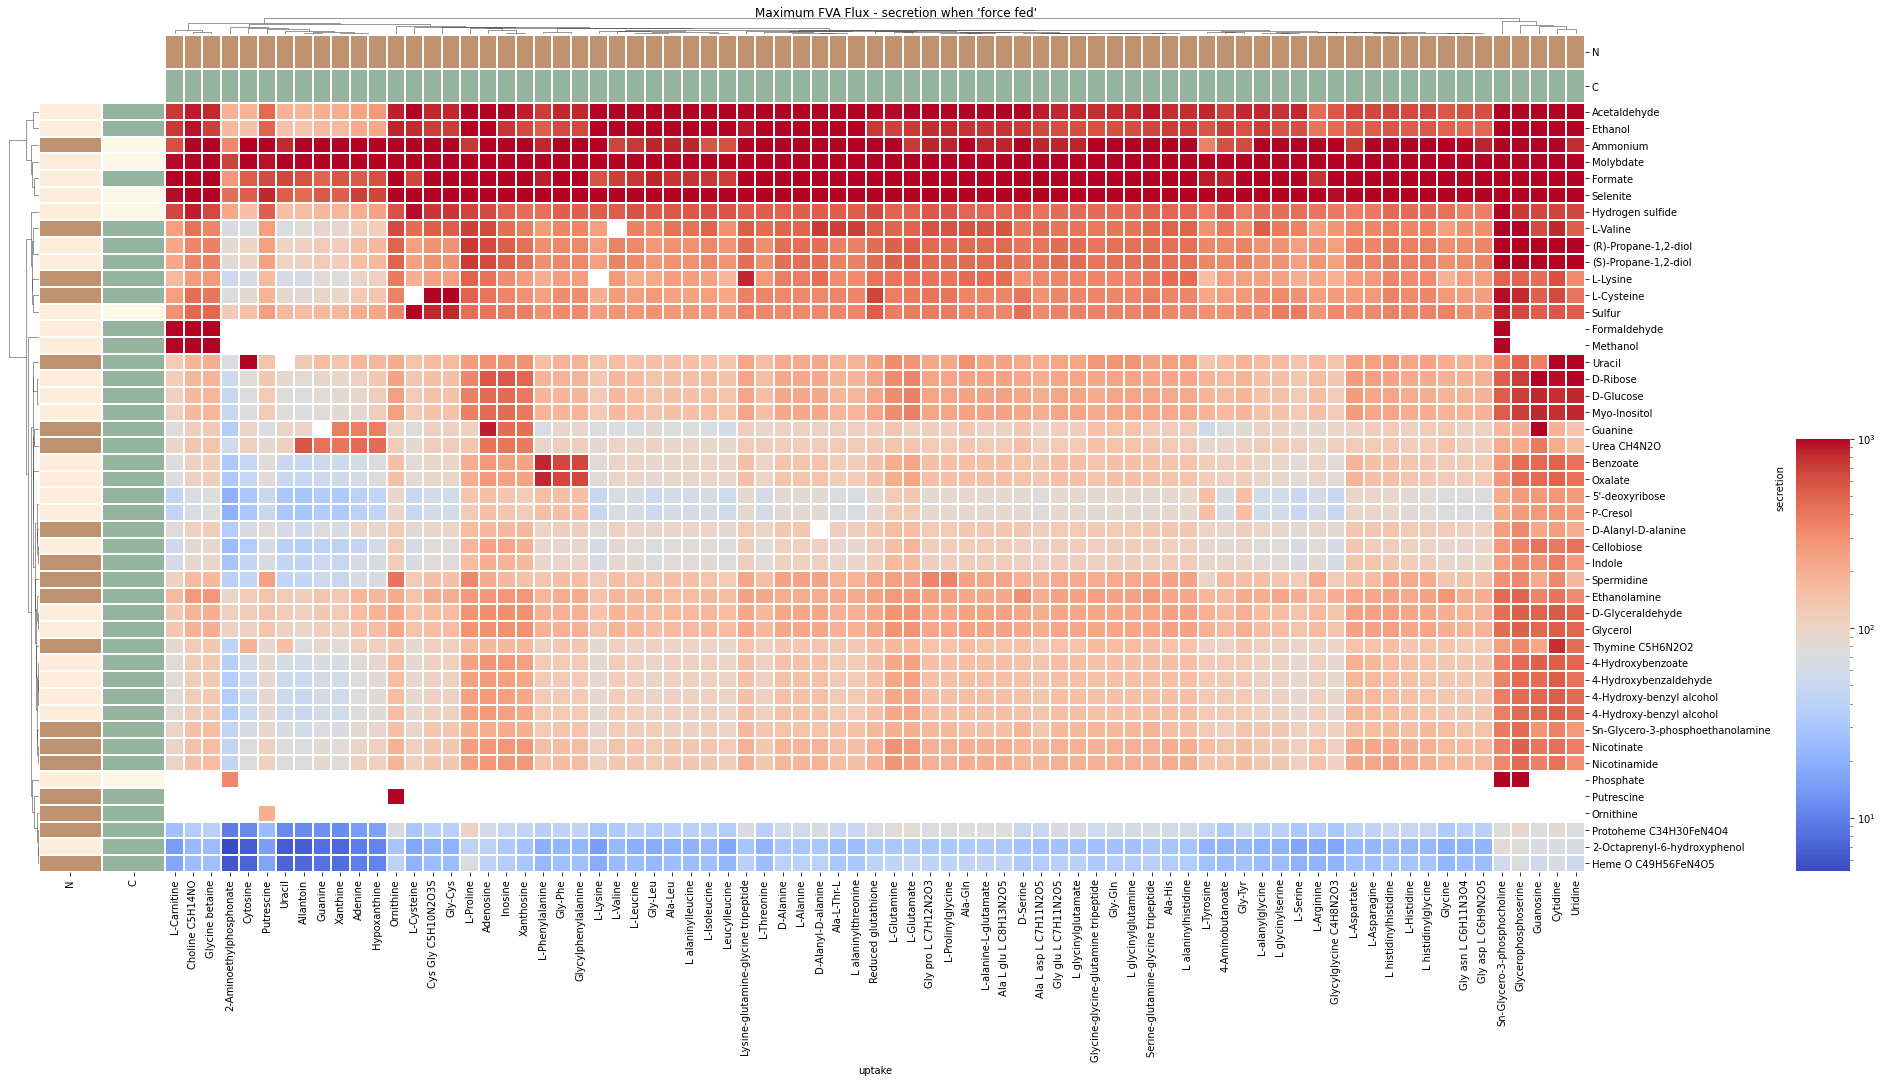

In [97]:

sns.clustermap(pdf, norm=LogNorm(), 
               cmap='coolwarm', figsize=(25,15), 
               linewidths=0.1, #cbar_kws= dict(location='right'),
               row_colors=row_anno[['N', 'C']],
               col_colors=col_anno[['N', 'C']],
               yticklabels= row_anno.metabolite,
               xticklabels= col_anno.metabolite,
               colors_ratio=0.04,
              robust=True, cbar_pos=(1, .2, .03, .4),
              dendrogram_ratio=0.02)
plt.suptitle("Maximum FVA Flux - secretion when 'force fed'", y=1)

In [105]:
pdf.shape

(46, 77)

In [34]:
len(exchange_ids)

101

In [140]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('ALT_N_sources.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df_growing.to_excel(writer, sheet_name='uptake')
df_growing2.to_excel(writer, sheet_name='uptake2')
n_exchange_df.to_excel(writer, sheet_name='secretion')
n_exchange2_df.to_excel(writer, sheet_name='secretion2')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [141]:
n_exchange_df.shape,n_exchange2_df.shape

((3164, 10), (19070, 14))

In [103]:
n_exchange_df.head(50)

,secretion,minimum,maximum,uptake,metabolite_uptake,N_uptake,C_uptake,metabolite_secretion,N_secretion,C_secretion
0,sink_2ohph_c,0.000000e+00,74.900799,EX_g3ps_e,Glycerophosphoserine,True,True,2-Octaprenyl-6-hydroxyphenol,False,True
1,sink_4crsol_c,0.000000e+00,261.202802,EX_g3ps_e,Glycerophosphoserine,True,True,P-Cresol,False,True
2,sink_4hba_c,0.000000e+00,465.914339,EX_g3ps_e,Glycerophosphoserine,True,True,4-Hydroxy-benzyl alcohol,False,True
4,sink_hemeO_c,0.000000e+00,69.879628,EX_g3ps_e,Glycerophosphoserine,True,True,Heme O C49H56FeN4O5,True,True
5,sink_mobd_c,0.000000e+00,1000.000000,EX_g3ps_e,Glycerophosphoserine,True,True,Molybdate,False,False
6,EX_12ppd__R_e,0.000000e+00,1000.000000,EX_g3ps_e,Glycerophosphoserine,True,True,"(R)-Propane-1,2-diol",False,True
7,EX_12ppd__S_e,0.000000e+00,1000.000000,EX_g3ps_e,Glycerophosphoserine,True,True,"(S)-Propane-1,2-diol",False,True
15,EX_4hba_e,0.000000e+00,465.914339,EX_g3ps_e,Glycerophosphoserine,True,True,4-Hydroxy-benzyl alcohol,False,True
16,EX_4hbald_e,0.000000e+00,463.277779,EX_g3ps_e,Glycerophosphoserine,True,True,4-Hydroxybenzaldehyde,False,True
17,EX_4hbz_e,0.000000e+00,465.157063,EX_g3ps_e,Glycerophosphoserine,True,True,4-Hydroxybenzoate,False,True


In [145]:
model.genes[30]

Gene identifier,GHNKPGAE_00838
Name,G_GHNKPGAE_00838
Memory address,0x7f95dd3a2e20
Functional,True
In 2 reaction(s),"4IZ5PPH, IZPN"
